**Nama : Aditya Budiansyah**

**NIM : 211351004**

**Kelas : Pagi B**

#**Import Dataset**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikhsanalfajar","key":"cd943f889af08e53aeff1b694cee17f6"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d rishidamarla/heart-disease-prediction

  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 6.36MB/s]


In [4]:
!mkdir heart-disease-prediction
!unzip heart-disease-prediction -d heart-disease-prediction
!ls heart-disease-prediction

Archive:  heart-disease-prediction.zip
  inflating: heart-disease-prediction/Heart_Disease_Prediction.csv  
Heart_Disease_Prediction.csv


#**Import Library**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#**Data Discovery**

In [6]:
df = pd.read_csv('heart-disease-prediction/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [9]:
df.shape

(270, 14)

In [15]:
df['Heart_Disease'].value_counts()

1    150
0    120
Name: Heart_Disease, dtype: int64

#**EDA**

<ipython-input-11-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

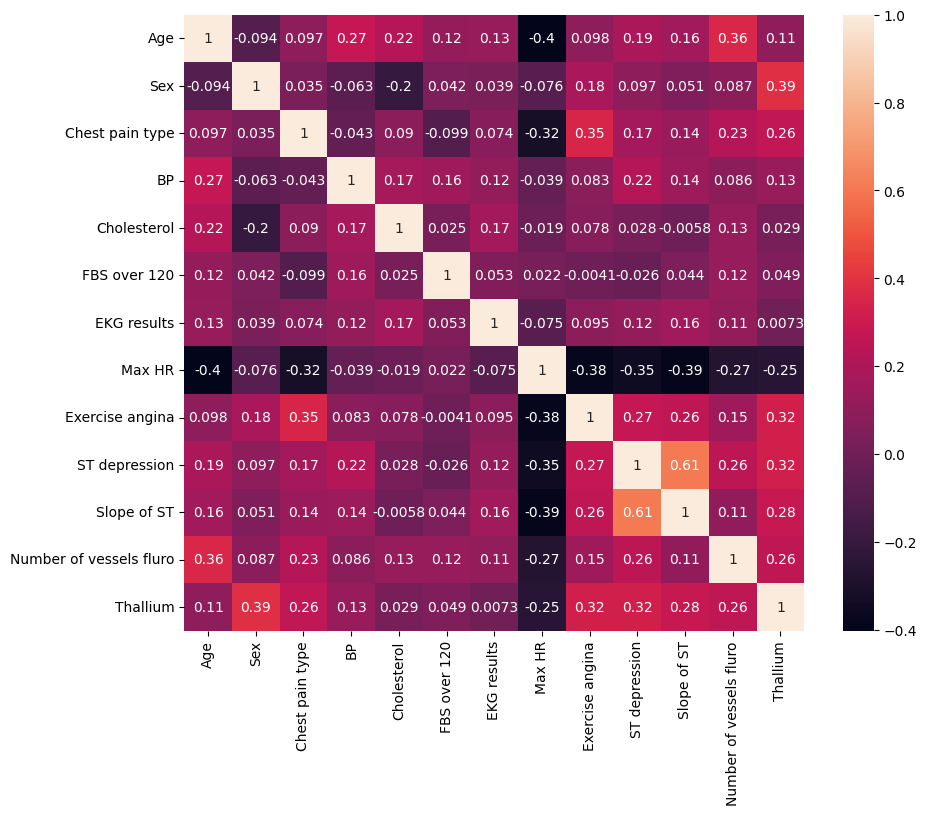

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

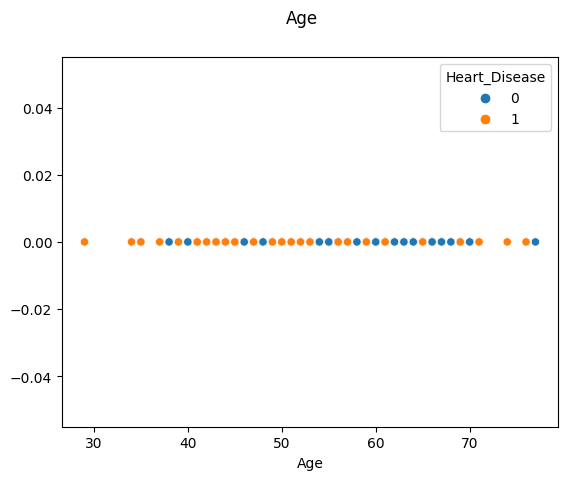

In [16]:
plt.suptitle("Age")
sns.scatterplot(data=df, x='Age', y=np.zeros(len(df['Age'])), hue=df['Heart_Disease'])
plt.show()

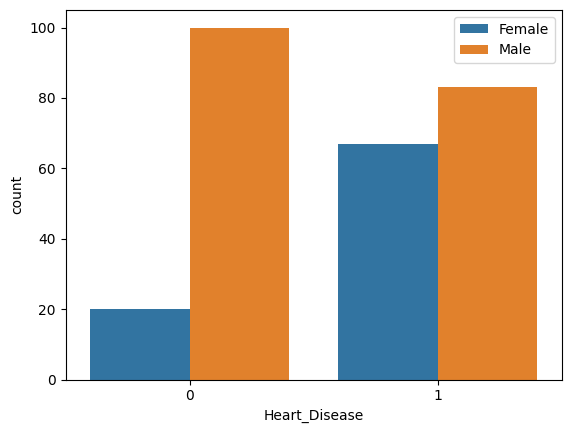

In [17]:
ax = sns.countplot(x='Heart_Disease', hue='Sex', data=df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Female','Male'], bbox_to_anchor=(1,1))
plt.show()

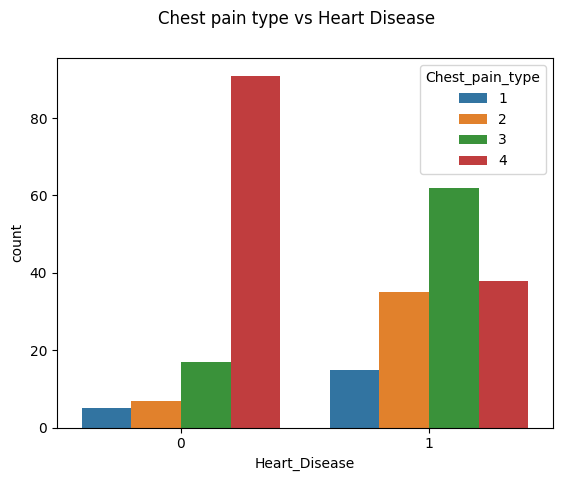

In [18]:
plt.suptitle('Chest pain type vs Heart Disease')
sns.countplot(data=df, x='Heart_Disease', hue='Chest_pain_type')
plt.show()

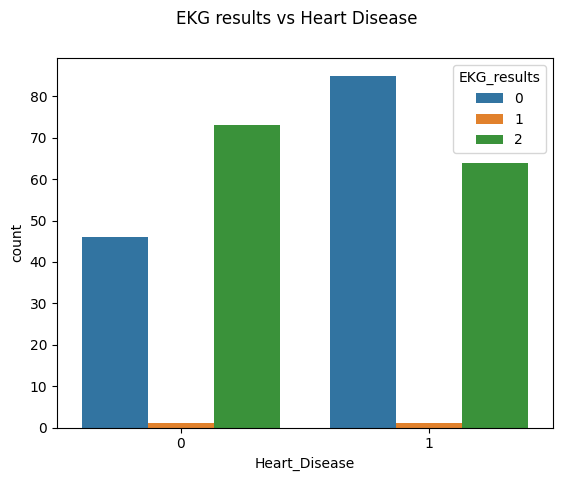

In [19]:
plt.suptitle('EKG results vs Heart Disease')
sns.countplot(data=df, x='Heart_Disease', hue='EKG_results')
plt.show()

#**Preprocesing**

In [13]:
df = df.rename(columns={'Chest pain type': 'Chest_pain_type', 'FBS over 120': 'FBS_over_120', 'EKG results': 'EKG_results', 'Max HR': 'Max_HR', 'Exercise angina': 'Exercise_angina', 'ST depression': 'ST_depression', 'Slope of ST': 'Slope_of_ST', 'Number of vessels fluro': 'Number_of_vessels_fluro', 'Heart Disease': 'Heart_Disease'})
print("\nDataframe setelah perubahan:")
print(df.dtypes)


Dataframe setelah perubahan:
Age                          int64
Sex                          int64
Chest_pain_type              int64
BP                           int64
Cholesterol                  int64
FBS_over_120                 int64
EKG_results                  int64
Max_HR                       int64
Exercise_angina              int64
ST_depression              float64
Slope_of_ST                  int64
Number_of_vessels_fluro      int64
Thallium                     int64
Heart_Disease               object
dtype: object


In [14]:
df['Heart_Disease'] = df['Heart_Disease'].replace({'Presence': 0, 'Absence': 1})

print("\nDataFrame setelah perubahan:")
print(df)


DataFrame setelah perubahan:
     Age  Sex  Chest_pain_type   BP  Cholesterol  FBS_over_120  EKG_results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max_HR  Exercise

In [20]:
df['ST_depression'] = df['ST_depression'].astype('int64')
df['Heart_Disease'] = df['Heart_Disease'].astype('int64')
print("\nTipe data setelah perubahan:")
print(df.dtypes)


Tipe data setelah perubahan:
Age                        int64
Sex                        int64
Chest_pain_type            int64
BP                         int64
Cholesterol                int64
FBS_over_120               int64
EKG_results                int64
Max_HR                     int64
Exercise_angina            int64
ST_depression              int64
Slope_of_ST                int64
Number_of_vessels_fluro    int64
Thallium                   int64
Heart_Disease              int64
dtype: object


In [21]:
df.isna().sum()

Age                        0
Sex                        0
Chest_pain_type            0
BP                         0
Cholesterol                0
FBS_over_120               0
EKG_results                0
Max_HR                     0
Exercise_angina            0
ST_depression              0
Slope_of_ST                0
Number_of_vessels_fluro    0
Thallium                   0
Heart_Disease              0
dtype: int64

In [32]:
df.to_csv('Heart-Disease-Prediction.csv')

#**Modeling**

In [23]:
ind_col = [col for col in df.columns if col != 'Heart_Disease']
dep_col = 'Heart_Disease'

In [24]:
df[dep_col].value_counts()

1    150
0    120
Name: Heart_Disease, dtype: int64

In [25]:
x = df[ind_col]
y = df[dep_col]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)

In [27]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n {confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn,fp,fn,tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.8811881188118812
akurasi data testing = 0.8529411764705882 

confusion matrix : 
 [[25  8]
 [ 2 33]]

classification report : 
               precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.80      0.94      0.87        35

    accuracy                           0.85        68
   macro avg       0.87      0.85      0.85        68
weighted avg       0.86      0.85      0.85        68



In [28]:
input_data = (70,1,4,130,322,0,2,109,0,2.4,2,3,3)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
  print('Pasien terkena penyakit jantung')
else:
  print('Pasien tidak terkena penyakit jantung')

[0]
Pasien terkena penyakit jantung


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#**Visualisasi hasil algoritma**

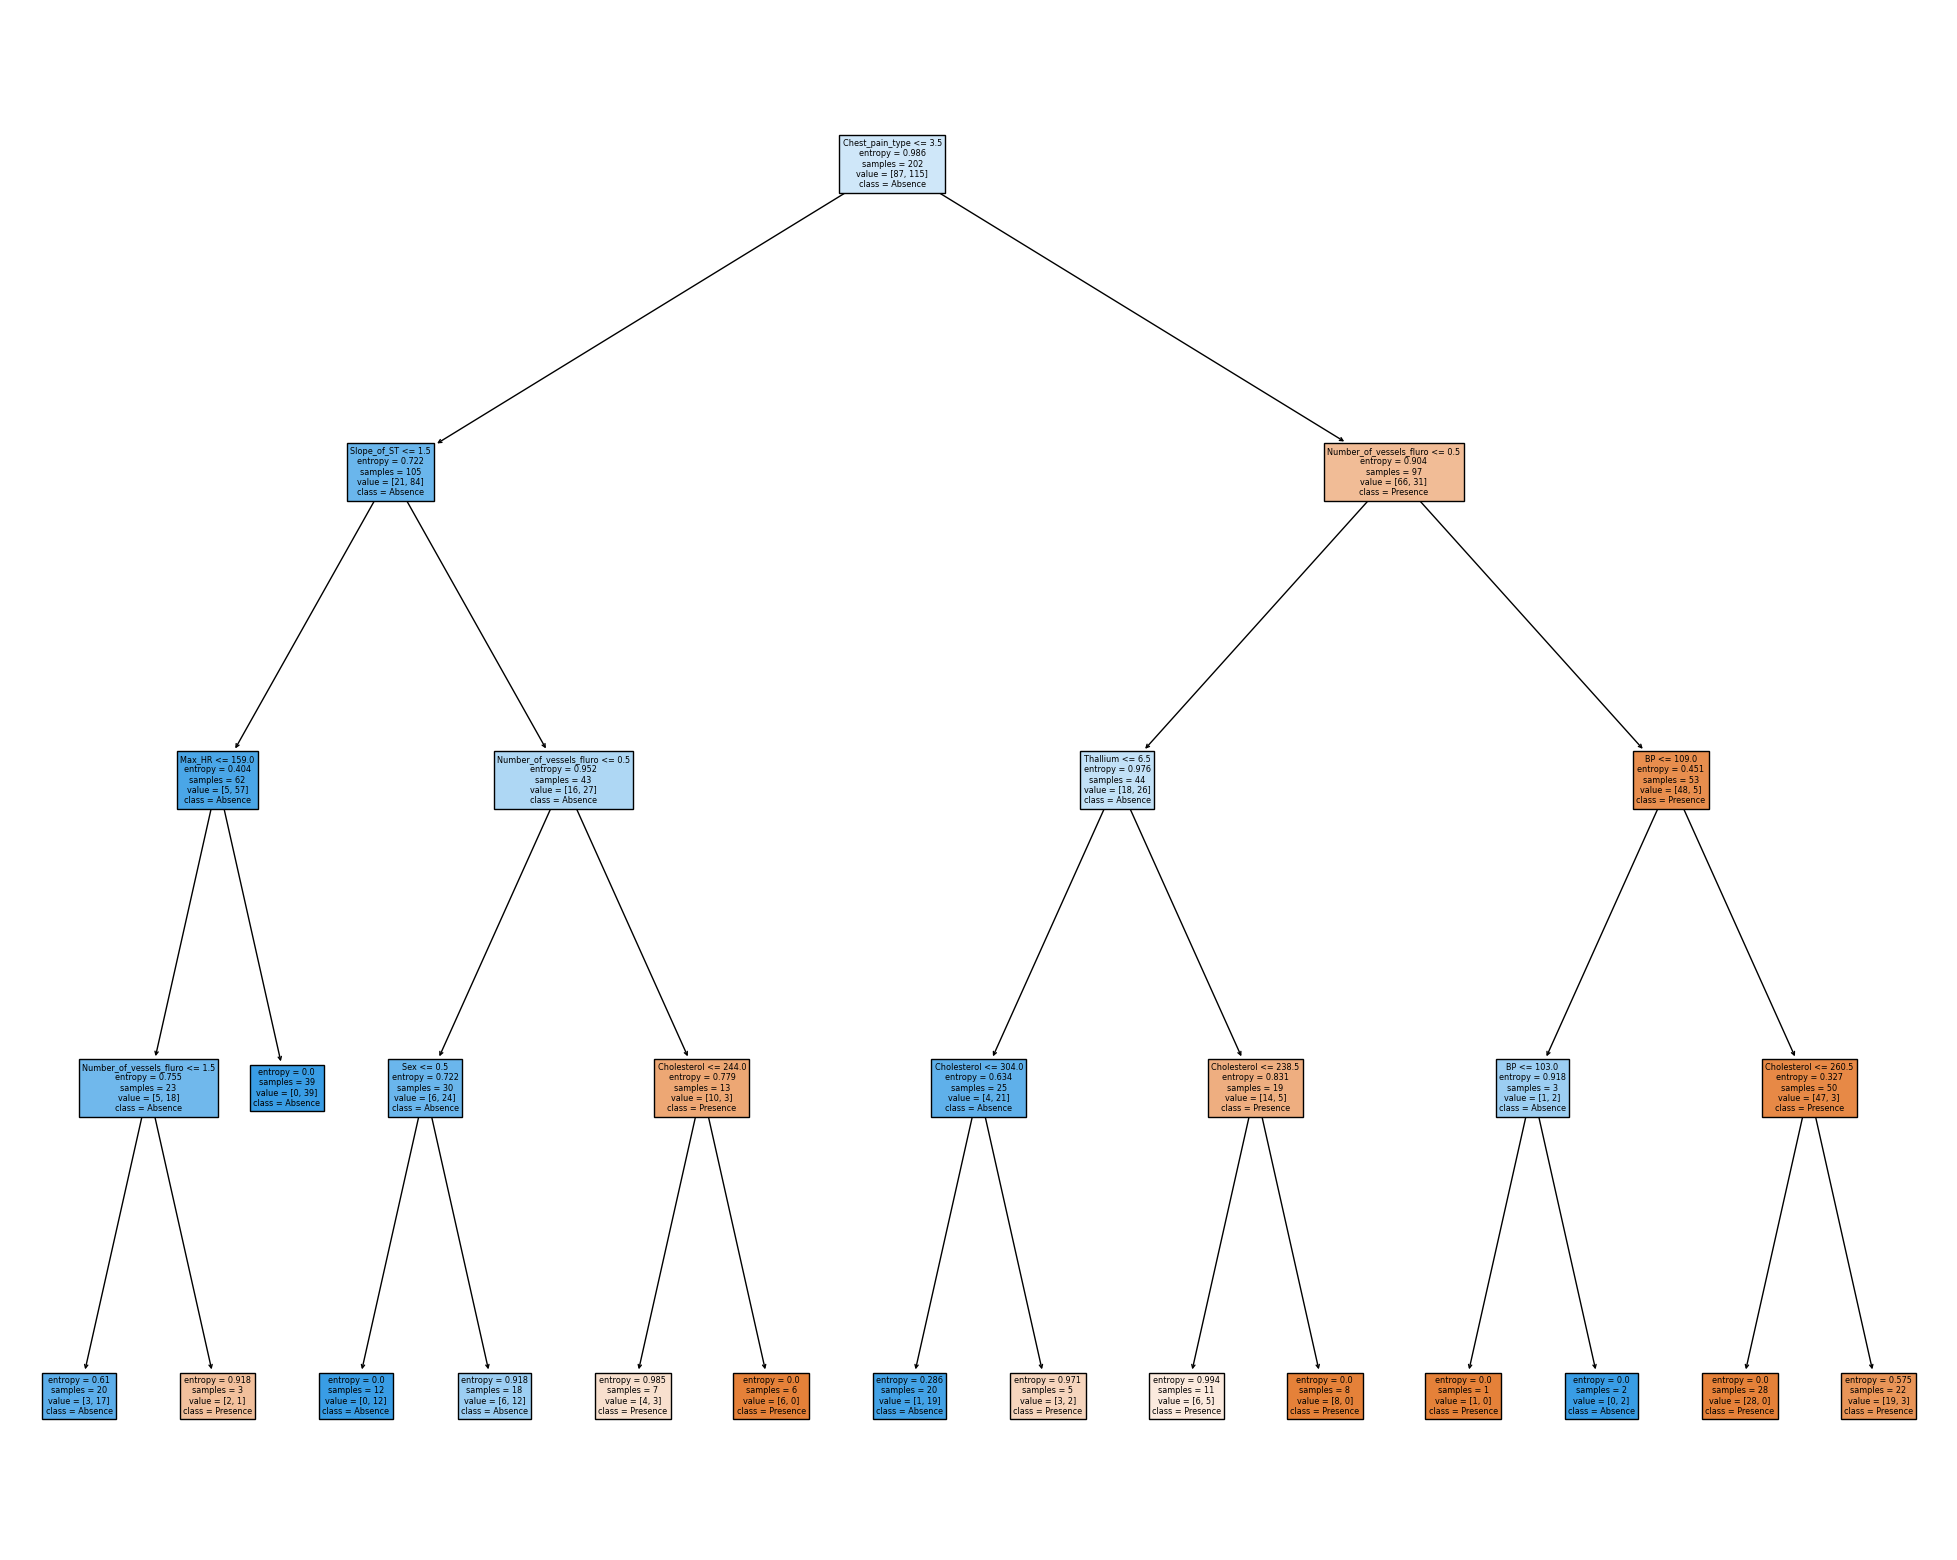

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                    feature_names=ind_col,
                    class_names=['Presence', 'Absence'],
                    filled=True)

#**Save Model**

In [33]:
import pickle

filename = 'heart_disease_prediction.sav'
pickle.dump(dtc,open(filename,'wb'))